In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

In [2]:
df = yf.download('^GSPC', start='2023-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
...,...,...,...,...,...,...
2023-10-11,4366.589844,4378.640137,4345.339844,4376.950195,4376.950195,3601660000
2023-10-12,4380.939941,4385.850098,4325.430176,4349.609863,4349.609863,3713140000
2023-10-13,4360.490234,4377.100098,4311.970215,4327.779785,4327.779785,0


In [4]:
supports = df[df.Low == df.Low.rolling(5, center=True).min()].Low
resistances = df[df.High == df.High.rolling(5, center=True).max()].High

In [5]:
levels = pd.concat([supports, resistances])

In [6]:
levels = levels[abs(levels.diff()) > 100]

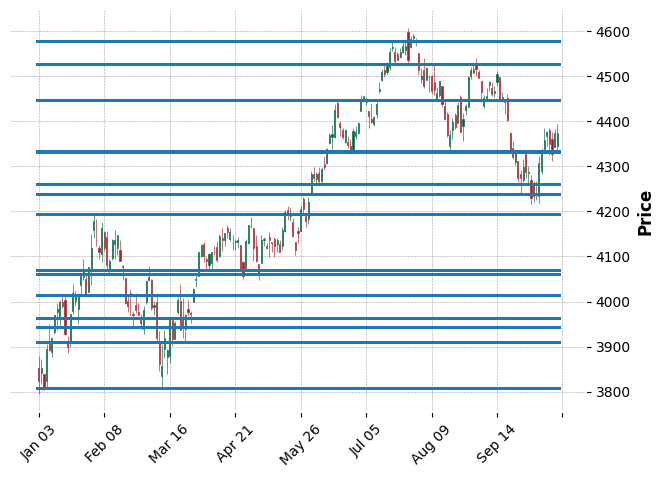

In [7]:
mpf.plot(df, type='candle', hlines=levels.to_list(), style='charles')

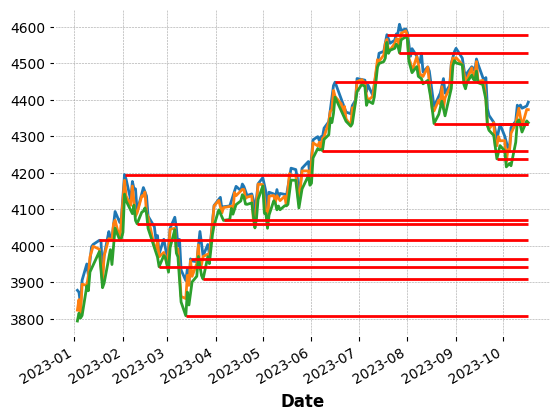

In [8]:
df.High.plot()
df.Close.plot()
df.Low.plot()
plt.hlines(levels, xmin=levels.index, xmax=df.index[-1], colors='red')